In [35]:
#import library
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
import json
import shap
import tensorflow as tf
import cv2
from shap.utils import image
import numpy as np

In [29]:
# load pre-trained model and choose two images to explain
model = ResNet50(weights='imagenet')

In [28]:
#Load custom Dataset
Dataset=[]
for i in range(1,4):
    im=image.load_image('image00'+str(i)+'.jpg')
    im=cv2.resize(im,(224,224))
    Dataset.append(im)
Dataset=np.array(Dataset)
Dataset.shape

(3, 224, 224, 3)

In [30]:
def f(X):
    tmp = X.copy()
    preprocess_input(tmp)
    return model(tmp)

In [31]:
# load the ImageNet class names as a vectorized mapping function from ids to names
url = "https://s3.amazonaws.com/deep-learning-models/image-models/imagenet_class_index.json"
with open(shap.datasets.cache(url)) as file:
    class_names = [v[1] for v in json.load(file).values()]

In [37]:
# define a masker that is used to mask out partitions of the input image, this one uses a blurred background
masker = shap.maskers.Image("inpaint_telea", Dataset[0].shape)

In [38]:
# By default the Partition explainer is used for all  partition explainer
explainer = shap.Explainer(f, masker, output_names=class_names)

explainers.Partition is still in an alpha state, so use with caution...


In [39]:
# here we use 500 evaluations of the underlying model to estimate the SHAP values
shap_values = explainer(Dataset[0:5], max_evals=500, batch_size=50, outputs=shap.Explanation.argsort.flip[:1])

Partition explainer:  33%|███████████████████████▋                                               | 1/3 [00:00<?, ?it/s]

Partition explainer: 100%|███████████████████████████████████████████████████████████████| 3/3 [01:37<00:00, 25.18s/it]

Partition explainer: 4it [02:24, 36.15s/it]                                                                            


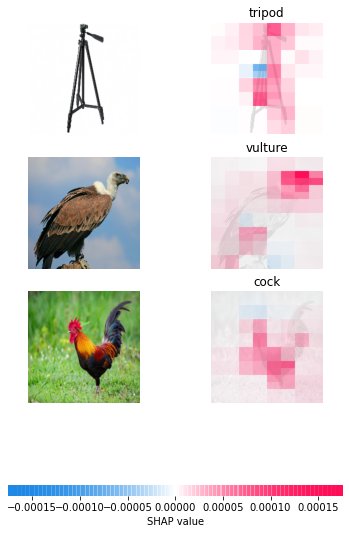

In [40]:
shap.image_plot(shap_values)

AttributeError: 'numpy.ndarray' object has no attribute 'load_image'